## Everything in one Set

Change your models in their definition and run the test

In [56]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration1

reload(iteration1)
reload(generic)
Cell = iteration1.SPI6
Config = iteration1.Config




NetCon[291].syn()
NetCon[292].syn()
NetCon[293].syn()
NetCon[294].syn()
NetCon[295].syn()
NetCon[296].syn()
NetCon[297].syn()
NetCon[298].syn()
NetCon[299].syn()
NetCon[300].syn()


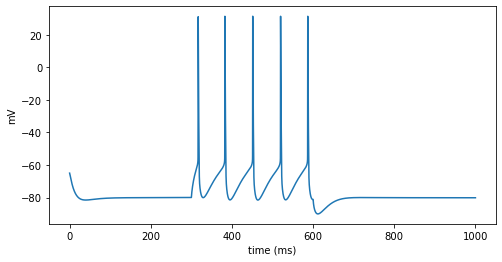

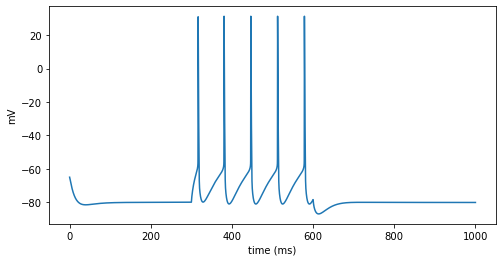

In [61]:
delay = 300
duration = 300
amp = 0
param = {"delay":delay,"dur":duration,"amp": 0.3}

reload(iteration1)
reload(generic)

def Synapses():
    config = Config(nsynapses=10, synapsee=-45, synapseweight=-0.00001)
    return Cell(config)

def Default():
    config = Config()
    return Cell(config)


cellbuilder = Synapses


trace = generic.stimulate(Synapses, param)
generic.plotTrace(trace)


trace = generic.stimulate(Default, param)
generic.plotTrace(trace)

In [ ]:
delay = 300
duration = 300
amp = 0
param = {"delay":delay,"dur":duration,"amp": 0.005}



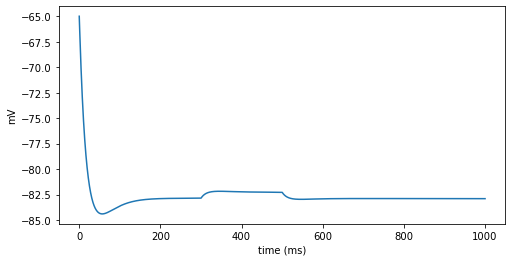

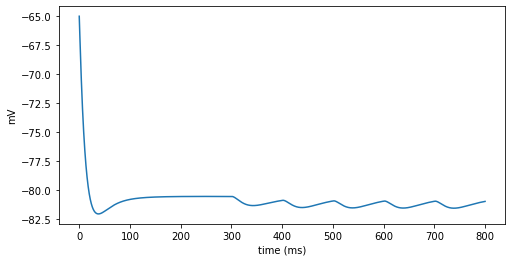

[NetCon[240], NetCon[241], NetCon[242], NetCon[243], NetCon[244], NetCon[245], NetCon[246], NetCon[247], NetCon[248], NetCon[249]]


In [53]:
delay = 300
duration = 200
amp = 0
param = {"delay":delay,"dur":duration,"amp": amp}


cell = cellbuilder()
singlepulse = h.IClamp(cell.soma(0.5))
singlepulse.delay = param["delay"]
singlepulse.dur = param["dur"]
singlepulse.amp = param["amp"]

apc = h.APCount(cell.soma(0.5))
apc.thresh = 10


netstim0 = h.NetStim()
netstim0.interval = 100
netstim0.start = 300
netstim0.noise = 0

synapsesparams = [{"type": "Exp2Syn", "loc": 0.1*i, "tau1": 20, "tau2": 55, "e": -70, "g": 1} for i in range(0,10)]
synapses = []
connections = []
for synapse in synapsesparams:
    if synapse["type"]: 

        syn = h.Exp2Syn(cell.ais(synapse["loc"]))
        syn.tau1 = synapse["tau1"]
        syn.tau2 = synapse["tau2"]
        syn.e = synapse["e"]
        
        synapses.append(syn)
        conn = h.NetCon(netstim0, syn)
        conn.weight[0] = -0.0001
        connections.append(conn)

v_vec = h.Vector()
a_vec = h.Vector()# Membrane potential vector
s_vec = h.Vector()
t_vec = h.Vector()  
v2_vec = h.Vector()# Time stamp vector
v_vec.record(cell.soma(0.5)._ref_v)
t_vec.record(h._ref_t)
apc.record(a_vec)
h.tstop = 800
h.run()

trace = {"v": np.array(v_vec), "t": np.array(t_vec) ,"aps": np.array(a_vec), "cellbuilder": cellbuilder, "params": param}

generic.plotTrace(trace)
print(connections)

In [51]:
[ item.syn().i for item in connections]

[5.672169412106539e-05,
 5.735143063392325e-05,
 5.775188380220713e-05,
 5.8137793090205965e-05,
 5.850928300203601e-05,
 5.886647338699688e-05,
 5.920947947905217e-05,
 5.953841193477223e-05,
 5.985337686975435e-05,
 6.015447589353463e-05]

In [47]:
connections[0].syn().i

-0.03768568672032458

In [6]:
it = [i for i in range(0,0)]

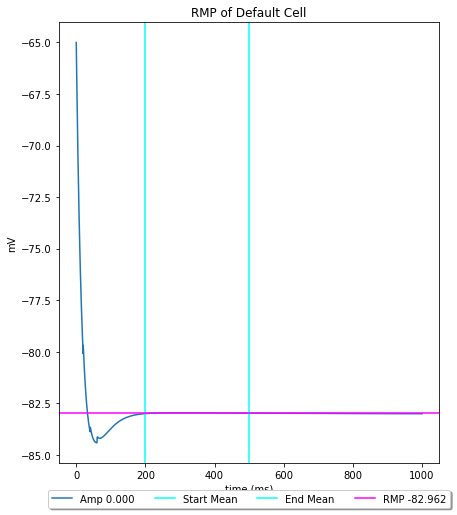

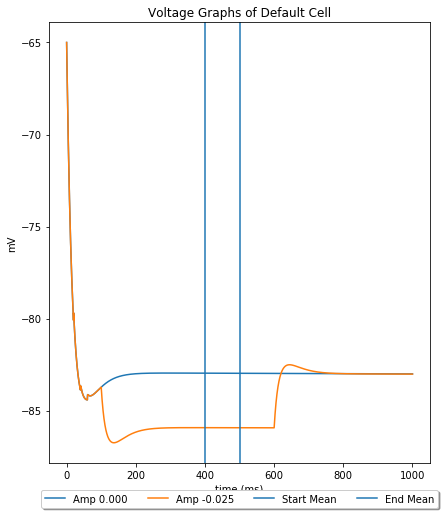

array([[-2.50000000e-02,  1.18358636e+02,  1.50992273e+02]])

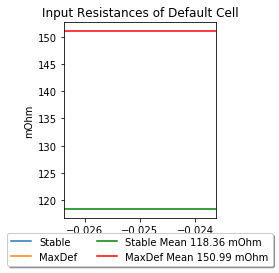

In [2]:
rmp.calculateRMP(cellbuilder, plot=True)
generic.calculateInputResistance(cellbuilder, mult=-0.025, iterations=2, plot=True, delay=100, duration=500)

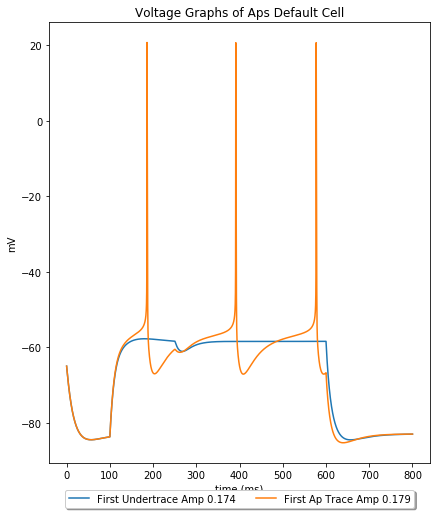

In [7]:
undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

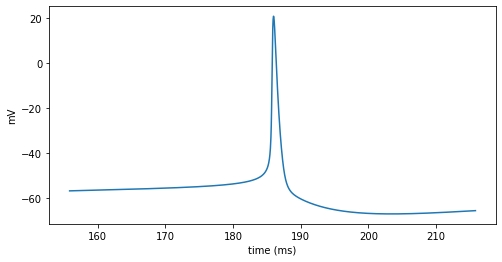

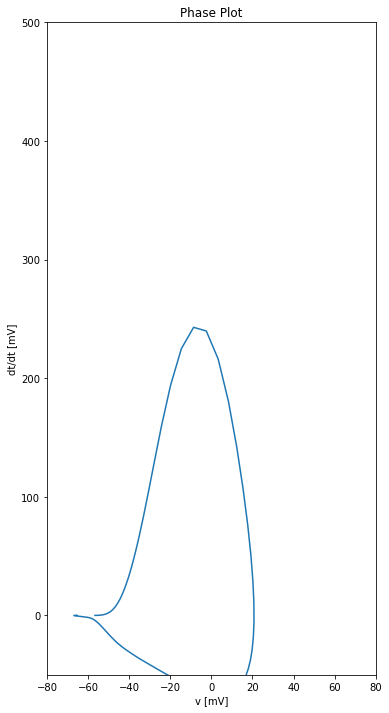

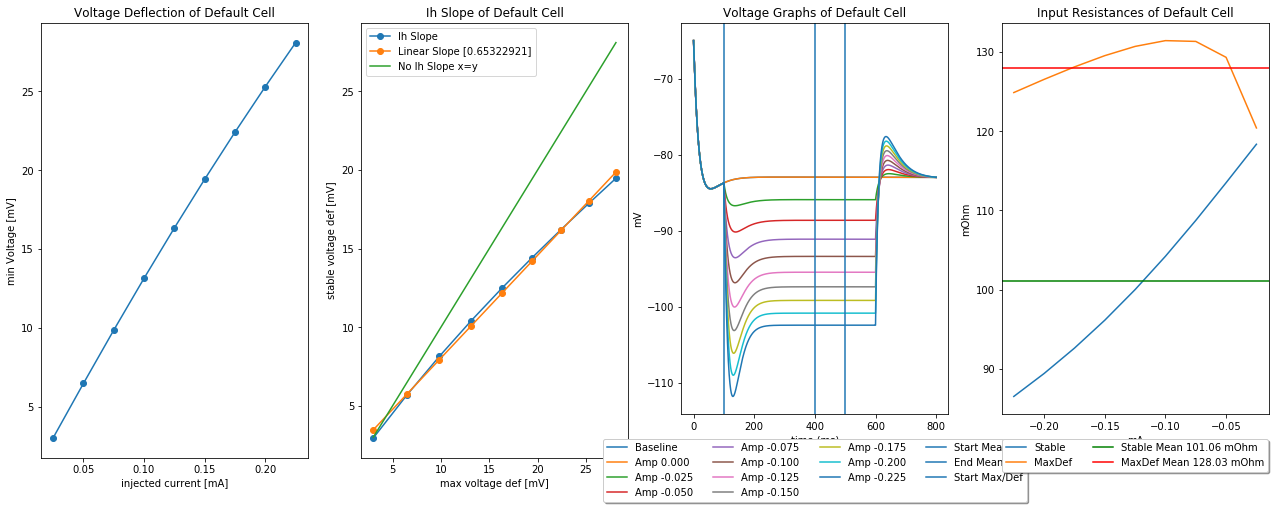

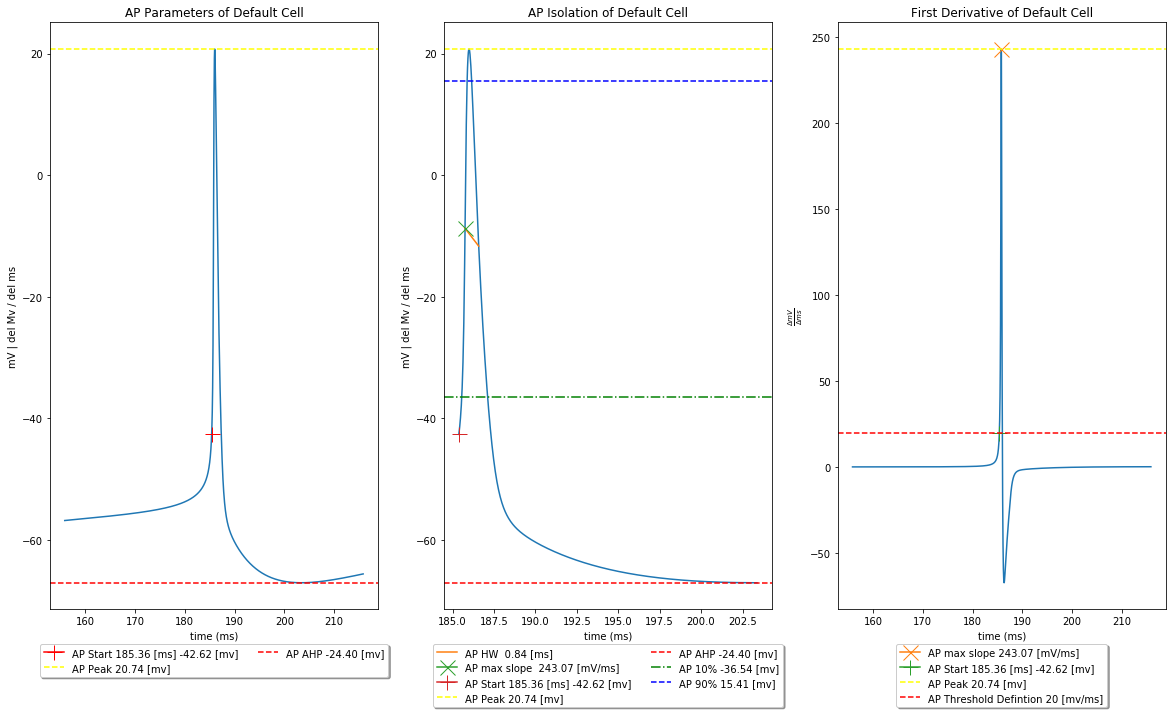

In [8]:
#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

In [31]:
overtrace

{'v': array([-65.        , -65.02910582, -65.06092727, ..., -81.00895328,
        -81.00894065, -81.00892803]),
 't': array([0.00000e+00, 2.50000e-02, 5.00000e-02, ..., 7.99950e+02,
        7.99975e+02, 8.00000e+02]),
 'aps': array([154.15 , 321.675, 490.65 ]),
 'cellbuilder': <function __main__.Default()>,
 'params': {'delay': 100, 'dur': 500, 'amp': 0.34720000000000006}}